In [41]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df = pd.read_csv("Mall Segmentation.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [43]:
# Preprocessing - removing irrelevant columns
df = df.drop(columns=["CustomerID"]) 

In [44]:
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [45]:
sc = StandardScaler()
SCdata = sc.fit_transform(df)
df = pd.DataFrame(SCdata,columns=df.columns)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,-0.886405,-0.276302,2.268791,1.118061
196,-0.886405,0.441365,2.497807,-0.861839
197,1.128152,-0.491602,2.497807,0.923953
198,1.128152,-0.491602,2.917671,-1.250054


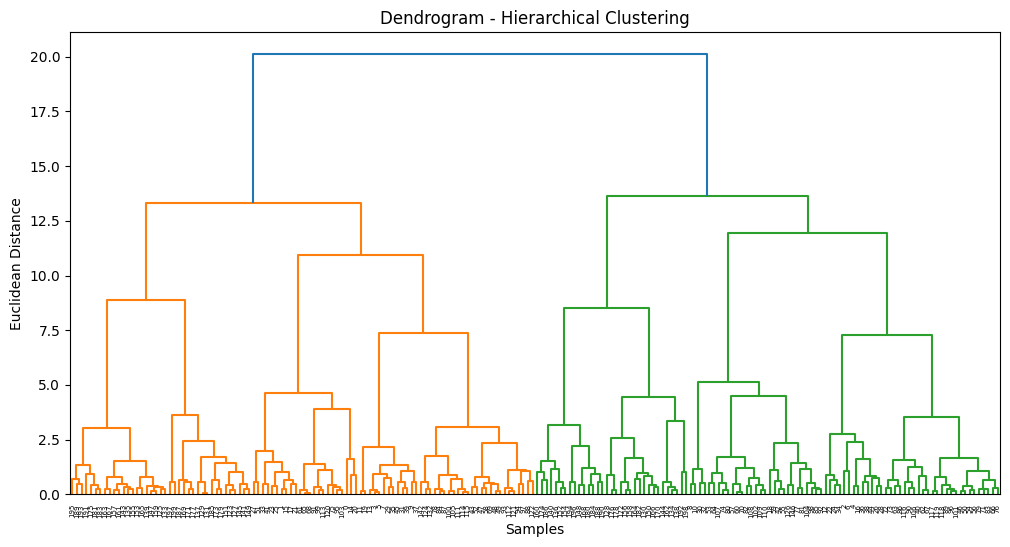

In [46]:
# Dendrogram
plt.figure(figsize=(12,6))
linked = linkage(df, method='ward')  
dendrogram(linked)
 
plt.title("Dendrogram - Hierarchical Clustering")
plt.xlabel("Samples")
plt.ylabel("Euclidean Distance")
plt.show()
 

In [47]:
hc = AgglomerativeClustering(n_clusters=5,
                             metric='euclidean',
                             linkage='ward')
df["hclust_label"] = hc.fit_predict(df)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),hclust_label
0,1.128152,-1.424569,-1.738999,-0.434801,0
1,1.128152,-1.281035,-1.738999,1.195704,0
2,-0.886405,-1.352802,-1.700830,-1.715913,3
3,-0.886405,-1.137502,-1.700830,1.040418,0
4,-0.886405,-0.563369,-1.662660,-0.395980,3


Explained variance: [0.50766986 0.17279224]


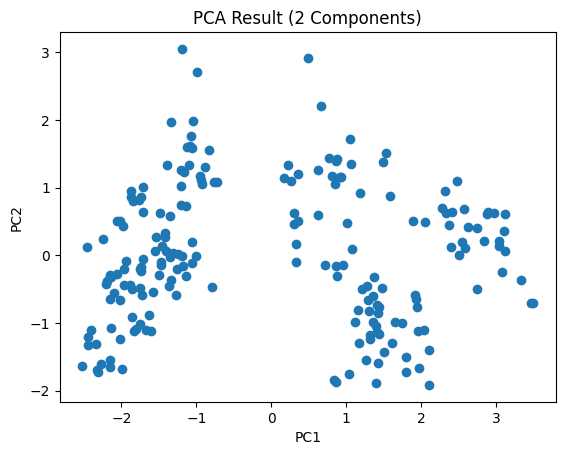

In [52]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
 
X = df.values
 
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
 
print("Explained variance:", pca.explained_variance_ratio_)
 
plt.scatter(X_pca[:,0], X_pca[:,1])
plt.title("PCA Result (2 Components)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()
 

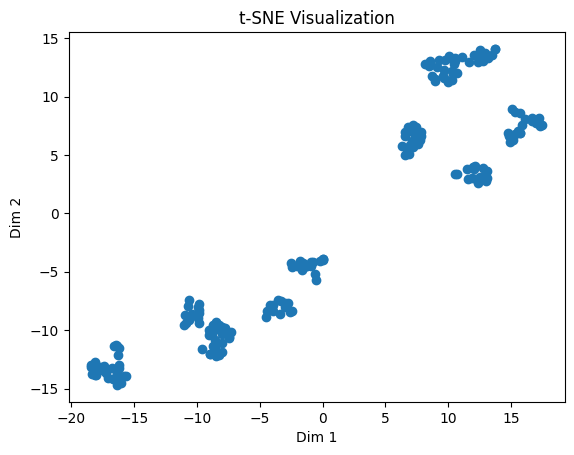

In [53]:
# t-SNE 
from sklearn.manifold import TSNE 
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200) 
X_tsne = tsne.fit_transform(X) 
plt.scatter(X_tsne[:,0], X_tsne[:,1])
plt.title("t-SNE Visualization")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.show() 

Explained variance: [0.50766986 0.17279224]


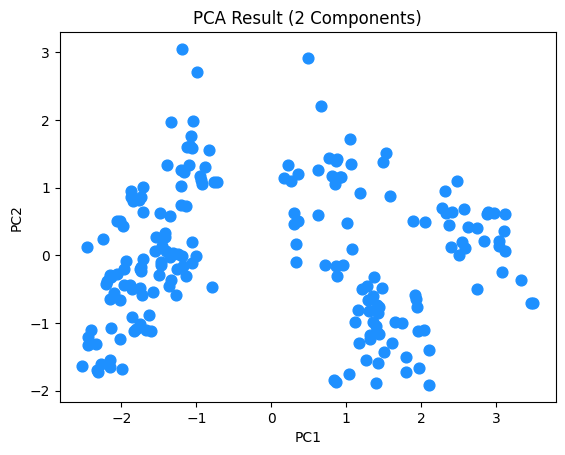

In [55]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
 
X = df.values
 
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
 
print("Explained variance:", pca.explained_variance_ratio_)
 
plt.scatter(X_pca[:,0], X_pca[:,1], s=60, color="dodgerblue")
plt.title("PCA Result (2 Components)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

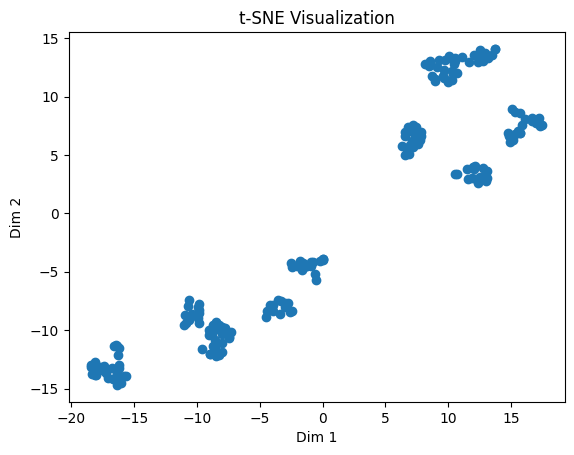

In [56]:
# t-SNE
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200)
X_tsne = tsne.fit_transform(X)
plt.scatter(X_tsne[:,0], X_tsne[:,1])
plt.title("t-SNE Visualization")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.show()